In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import numpy as np
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
# datagen.fit에 parameter로 넣기 위해서 이미지의 차원을 3차원으로 늘렸습니다.  =>  1 x 28 x 28
train_images = train_images.reshape(train_images.shape[0], 1, train_images.shape[1], train_images.shape[2]).astype('float32') / 255
test_images = test_images.reshape(test_images.shape[0], 1, test_images.shape[1], test_images.shape[2]).astype('float32') / 255

In [4]:
train_images.shape

(60000, 1, 28, 28)

In [0]:
datagen = ImageDataGenerator(
        rotation_range=90,       # 회전
        height_shift_range=0.5,  # 상하 이동
        zoom_range=0.5)          # 확대 범위

In [6]:
datagen.fit(train_images)  # 이미지를 augmentation 해줍니다.

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  ' channels).')


In [0]:
train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

In [8]:
model = Sequential()
# 784의 1차원으로 augmentation 하는 법은 몰라서 3차원 이미지를 CNN으로 넣었습니다.
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(1, 28, 28)))
# 다음 층으로 전달할때는 1차원으로 변경하였습니다.
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

W0726 07:05:11.209043 139881794787200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 07:05:11.253966 139881794787200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 07:05:11.265288 139881794787200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0726 07:05:11.344317 139881794787200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0726 07:05:11.378561 139881794787200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


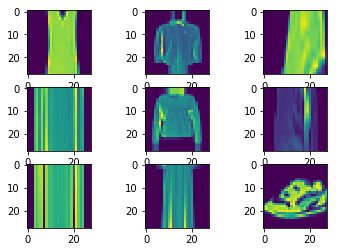

In [10]:
# flow를 통해 우선 batch 로 augmentation 된 이미지들을 가져옵니다.
_batch = datagen.flow(train_images, train_labels, batch_size=512)
for i in range(0, 9):
  plt.subplot(330 + 1 + i)  # 331 ~ 339의 subplot
  plt.imshow(_batch[i][0][0].reshape(28, 28))    # i번째 batch의 train_images 중 1번째  => 512 x 2 x 1 x 28 x 28 에서의 28 x 28
plt.show()

In [11]:
# fit_generator로 가져온 이미지들을 가지고 학습을 합니다.
model.fit_generator(_batch, steps_per_epoch = 1, epochs = 300)

W0726 07:05:16.828876 139881794787200 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0726 07:05:16.905617 139881794787200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/300
1/1 [==============================] - 7s 7s/step - loss: 2.3015 - acc: 0.1504
Epoch 2/300
1/1 [==============================] - 0s 19ms/step - loss: 2.1582 - acc: 0.2969
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 2.0410 - acc: 0.3828
Epoch 4/300
1/1 [==============================] - 0s 10ms/step - loss: 1.9316 - acc: 0.4004
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 1.8246 - acc: 0.4316
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 1.7253 - acc: 0.4492
Epoch 7/300
1/1 [==============================] - 0s 13ms/step - loss: 1.5779 - acc: 0.4688
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 1.4531 - acc: 0.5215
Epoch 9/300
1/1 [==============================] - 0s 16ms/step - loss: 1.3772 - acc: 0.5195
Epoch 10/300
1/1 [==============================] - 0s 12ms/step - loss: 1.3399 - acc: 0.5645
Epoch 11/300
1/1 [==============================] - 0s 13ms/step - loss

In [12]:
print("Accuracy : %.4f" % (model.evaluate(test_images, test_labels)[1]))
# 만약 모든 모델의 Test set에 대해 augmentation을 적용했다면 이 모델이 더 좋은 성능을 보였을 것 같습니다.

10000/10000 [==============================] - 1s 109us/step
Accuracy : 0.8228
